In [243]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import scipy.stats as stats
from statsmodels.tsa.stattools import acf
import pandas as pd
import scipy.optimize
sns.set()

In [244]:
fi=0.2
sigma=0.4
n=1000

In [245]:
X_t=np.zeros(n)
X_t[0]=0
for i in range(1,n):
    X_t[i]=fi*X_t[i-1]+np.random.normal(0,sigma)

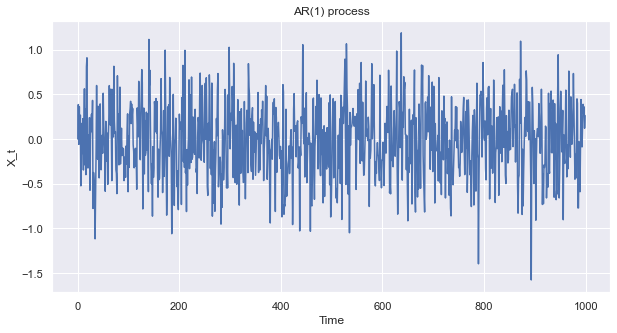

In [246]:
plt.figure(figsize=(10,5))
plt.plot(X_t)
plt.title("AR(1) process")
plt.xlabel("Time")
plt.ylabel("X_t")
plt.show()

In [247]:
def theoretical_ar1_cov(h,fi,sigma):
    return (sigma/(1-fi**2))*fi**h

Text(0.5, 1.0, 'Theoretical autocovariance of AR(1) process')

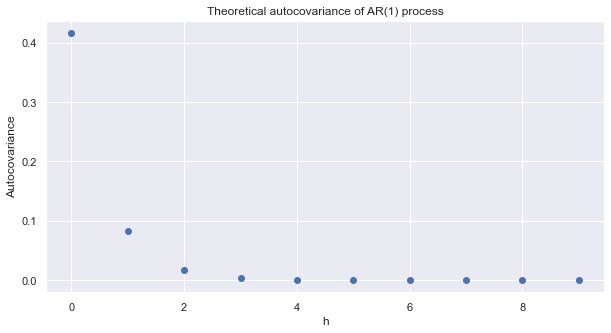

In [248]:
h=np.arange(0,10)
plt.figure(figsize=(10,5))
plt.scatter(h,theoretical_ar1_cov(h,fi,sigma),label="Theoretical covariance")
plt.xlabel("h")
plt.ylabel("Autocovariance")
plt.title("Theoretical autocovariance of AR(1) process")

In [249]:
def empirical_ar1_cov(X_t, h):
    n = len(X_t)
    mean = np.mean(X_t)
    autocov = np.zeros(h.shape)
    for i in range(len(h)):
        if h[i] == 0:
            autocov[i] = np.var(X_t)
        else:
            autocov[i] = np.sum((X_t[:n-h[i]] - mean) * (X_t[h[i]:] - mean)) / (n - h[i])
    return autocov


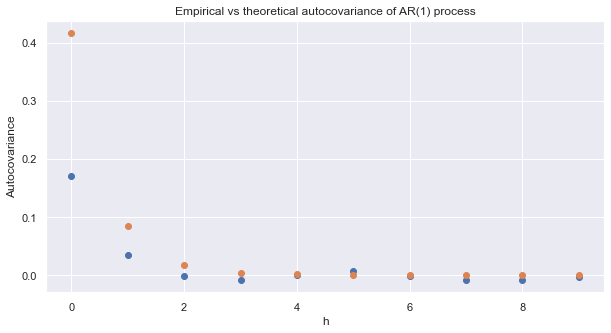

In [250]:
h = np.arange(0, 10)
autocov_empirical = empirical_ar1_cov(X_t, h)

plt.figure(figsize=(10, 5))
plt.scatter(h, autocov_empirical, label="Empirical autocovariance")
plt.scatter(h,theoretical_ar1_cov(h,fi,sigma),label="Theoretical covariance")

plt.xlabel("h")
plt.ylabel("Autocovariance")
plt.title("Empirical vs theoretical autocovariance of AR(1) process")
plt.show()

# Zad 2

In [280]:
def empirical_ar1_cov(series, lags):
    mean = np.mean(series)
    n = len(series)
    autocov = [np.sum((series[:n-lag] - mean) * (series[lag:] - mean)) / n for lag in lags]
    return autocov

In [281]:
def simulate_ar1(phi, sigma, n):
    X_t = np.zeros(n)
    X_t[0] = 0
    for i in range(1, n):
        X_t[i] = phi * X_t[i-1] + np.random.normal(0, sigma)
    return X_t

In [283]:
num_trajectories=1000
trajectories = pd.DataFrame([simulate_ar1(phi, sigma_sq, length) for _ in range(num_trajectories)])

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.348186,-0.134601,0.182327,0.595098,-0.282919,0.835827,0.718144,-0.239305,-0.122003,...,0.208253,0.015398,-0.063788,-0.195319,-0.027504,-0.061430,0.780239,0.087073,-0.031587,0.190161
1,0.0,0.718964,0.298800,-0.018700,-1.052139,-0.115169,-0.391932,0.356290,-0.282810,0.130608,...,-0.190922,-0.403229,-0.299510,0.159948,0.132980,0.156547,0.558822,0.106273,-0.721187,-0.276990
2,0.0,-0.772043,-0.331467,0.268263,0.012359,-0.283062,0.152203,-0.066077,-0.503688,-0.273548,...,-0.126758,0.227357,0.208446,-0.577069,-0.424967,0.730987,-0.450193,-0.143341,-0.866162,-0.189119
3,0.0,0.010905,0.379112,-0.025379,-0.095896,0.177820,0.639085,0.266472,0.461727,1.013971,...,0.322218,-0.128826,-0.171631,0.397306,0.339566,0.671043,-0.025733,0.070792,-0.422640,-0.199420
4,0.0,0.814388,-0.003799,-0.099544,-0.066345,-0.420282,-0.096999,-0.532209,0.238888,-0.174935,...,0.553526,-0.129607,0.341496,-0.396814,-0.140556,-0.251236,-0.200537,0.132350,0.351262,0.445824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,-0.228472,0.319854,-0.295257,0.281223,0.118757,0.826896,-0.152796,-0.486945,0.450401,...,-0.390138,0.208035,-0.139638,0.527865,-0.424604,-0.667233,-0.216796,0.420034,-0.503941,-0.048833
996,0.0,0.174520,-0.081912,0.168968,0.409083,-0.412728,-0.137459,-0.008536,-0.367780,0.109554,...,-0.514063,0.127556,0.461014,-0.513098,-0.427444,-0.901564,-1.264727,-0.405213,0.039664,-0.003457
997,0.0,0.826835,0.432851,0.109033,-0.930449,0.122890,0.500375,-0.225097,0.176760,-0.261720,...,1.102678,-0.318290,-0.274744,0.326643,0.086084,-0.405824,0.404389,0.206026,0.158158,-0.232848
998,0.0,0.283258,0.082038,-0.685383,-0.286694,-0.487733,0.477075,0.473799,-0.392507,0.774071,...,-0.223909,-0.973406,-0.229694,-0.260380,-0.238054,-0.074108,0.036935,-0.034785,0.178356,0.454046


In [286]:
lags = np.arange(-20, 21)
autocov_empiricals = []
for i in range(num_trajectories):
    autocov_empirical = empirical_ar1_cov(trajectories.iloc[i, :], lags)
    autocov_empiricals.append(autocov_empirical)

In [289]:
len(autocov_empiricals)

1000

# Zad 1 again

In [ ]:
phi = 0.2
sigma_sq = 0.4
length = 1000

In [ ]:
X = np.zeros(length)
X[0] = 0

for t in range(1, length):
    Zt = np.random.normal(0, np.sqrt(sigma_sq))
    X[t] = phi * X[t-1] + Zt

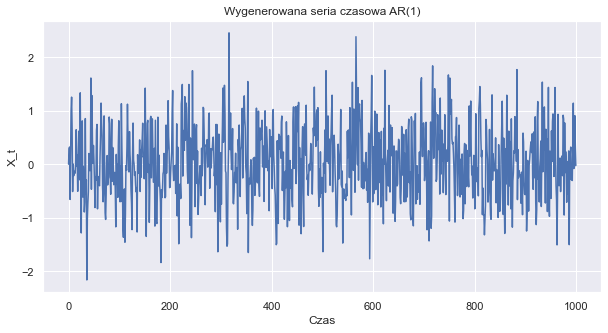

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(X)
plt.title("Wygenerowana seria czasowa AR(1)")
plt.xlabel("Czas")
plt.ylabel("X_t")
plt.show()

In [ ]:
def empirical_autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    autocov = sum((series[:n-lag] - mean) * (series[lag:] - mean)) / n
    return autocov

In [ ]:
def theoretical_autocovariance(lag, phi, sigma_sq):
    return (sigma_sq / (1 - phi**2)) * phi**lag

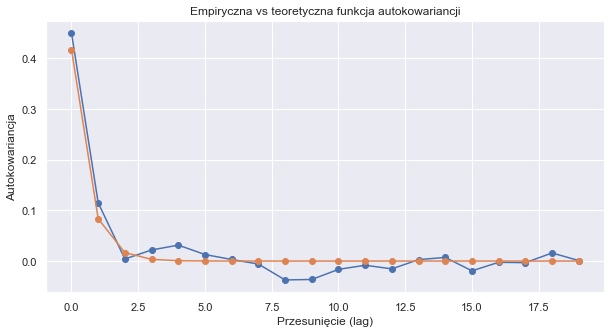

In [ ]:
lags = np.arange(0,20)
autocovariances = [empirical_autocovariance(X, lag) for lag in lags]
autocovariances_theoretical = [theoretical_autocovariance(lag, phi, sigma_sq) for lag in lags]

plt.figure(figsize=(10,5))
plt.plot(lags, autocovariances, marker='o')
plt.plot(lags, autocovariances_theoretical, marker='o', label='Empiryczna')
plt.title("Empiryczna vs teoretyczna funkcja autokowariancji")
plt.xlabel("Przesunięcie (lag)")
plt.ylabel("Autokowariancja")
plt.show()

In [ ]:
def autocorr_empirical(series, lag):
    n = len(series)
    mean = np.mean(series)
    autocov = sum((series[:n-lag] - mean) * (series[lag:] - mean)) / n
    var = sum((series - mean)**2) / n
    return autocov / var

In [ ]:
autocorr_empi=[]
for i in range(len(lags)):
    autocorr_empi.append(autocorr_empirical(X,lags[i]))

autocorrelations_theoretical=[theoretical_autocovariance(lag,phi,sigma_sq)/theoretical_autocovariance(0,phi,sigma_sq) for lag in lags]

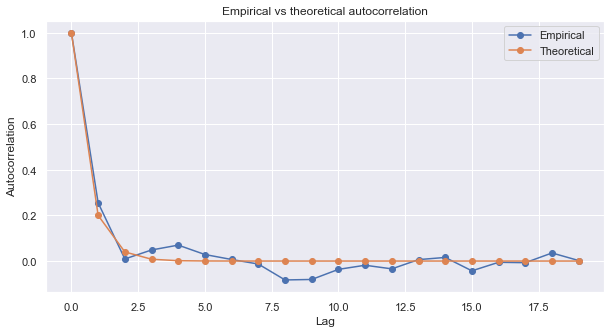

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(lags,autocorr_empi,marker='o',label="Empirical")
plt.plot(lags,autocorrelations_theoretical,marker='o',label="Theoretical")
plt.title("Empirical vs theoretical autocorrelation")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.legend()
plt.show()